In [1]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
from typing import List, Tuple
from scipy.spatial import cKDTree
import matplotlib.font_manager as fm
import matplotlib 
from pathlib import Path
from matplotlib.backends.backend_pdf import PdfPages

# increase the resolution of the plot
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

In [2]:
pcd_path = "/Users/luiskremer/Code/Uni/Code_Master_RSIV/019_scanline_segmentation/data/04_scanline_extraction/SiteA_RHV_01_Labeled_scnln.txt"
pcd = np.loadtxt(pcd_path, delimiter=" ")

In [ ]:
sns.color_palette("husl", 2

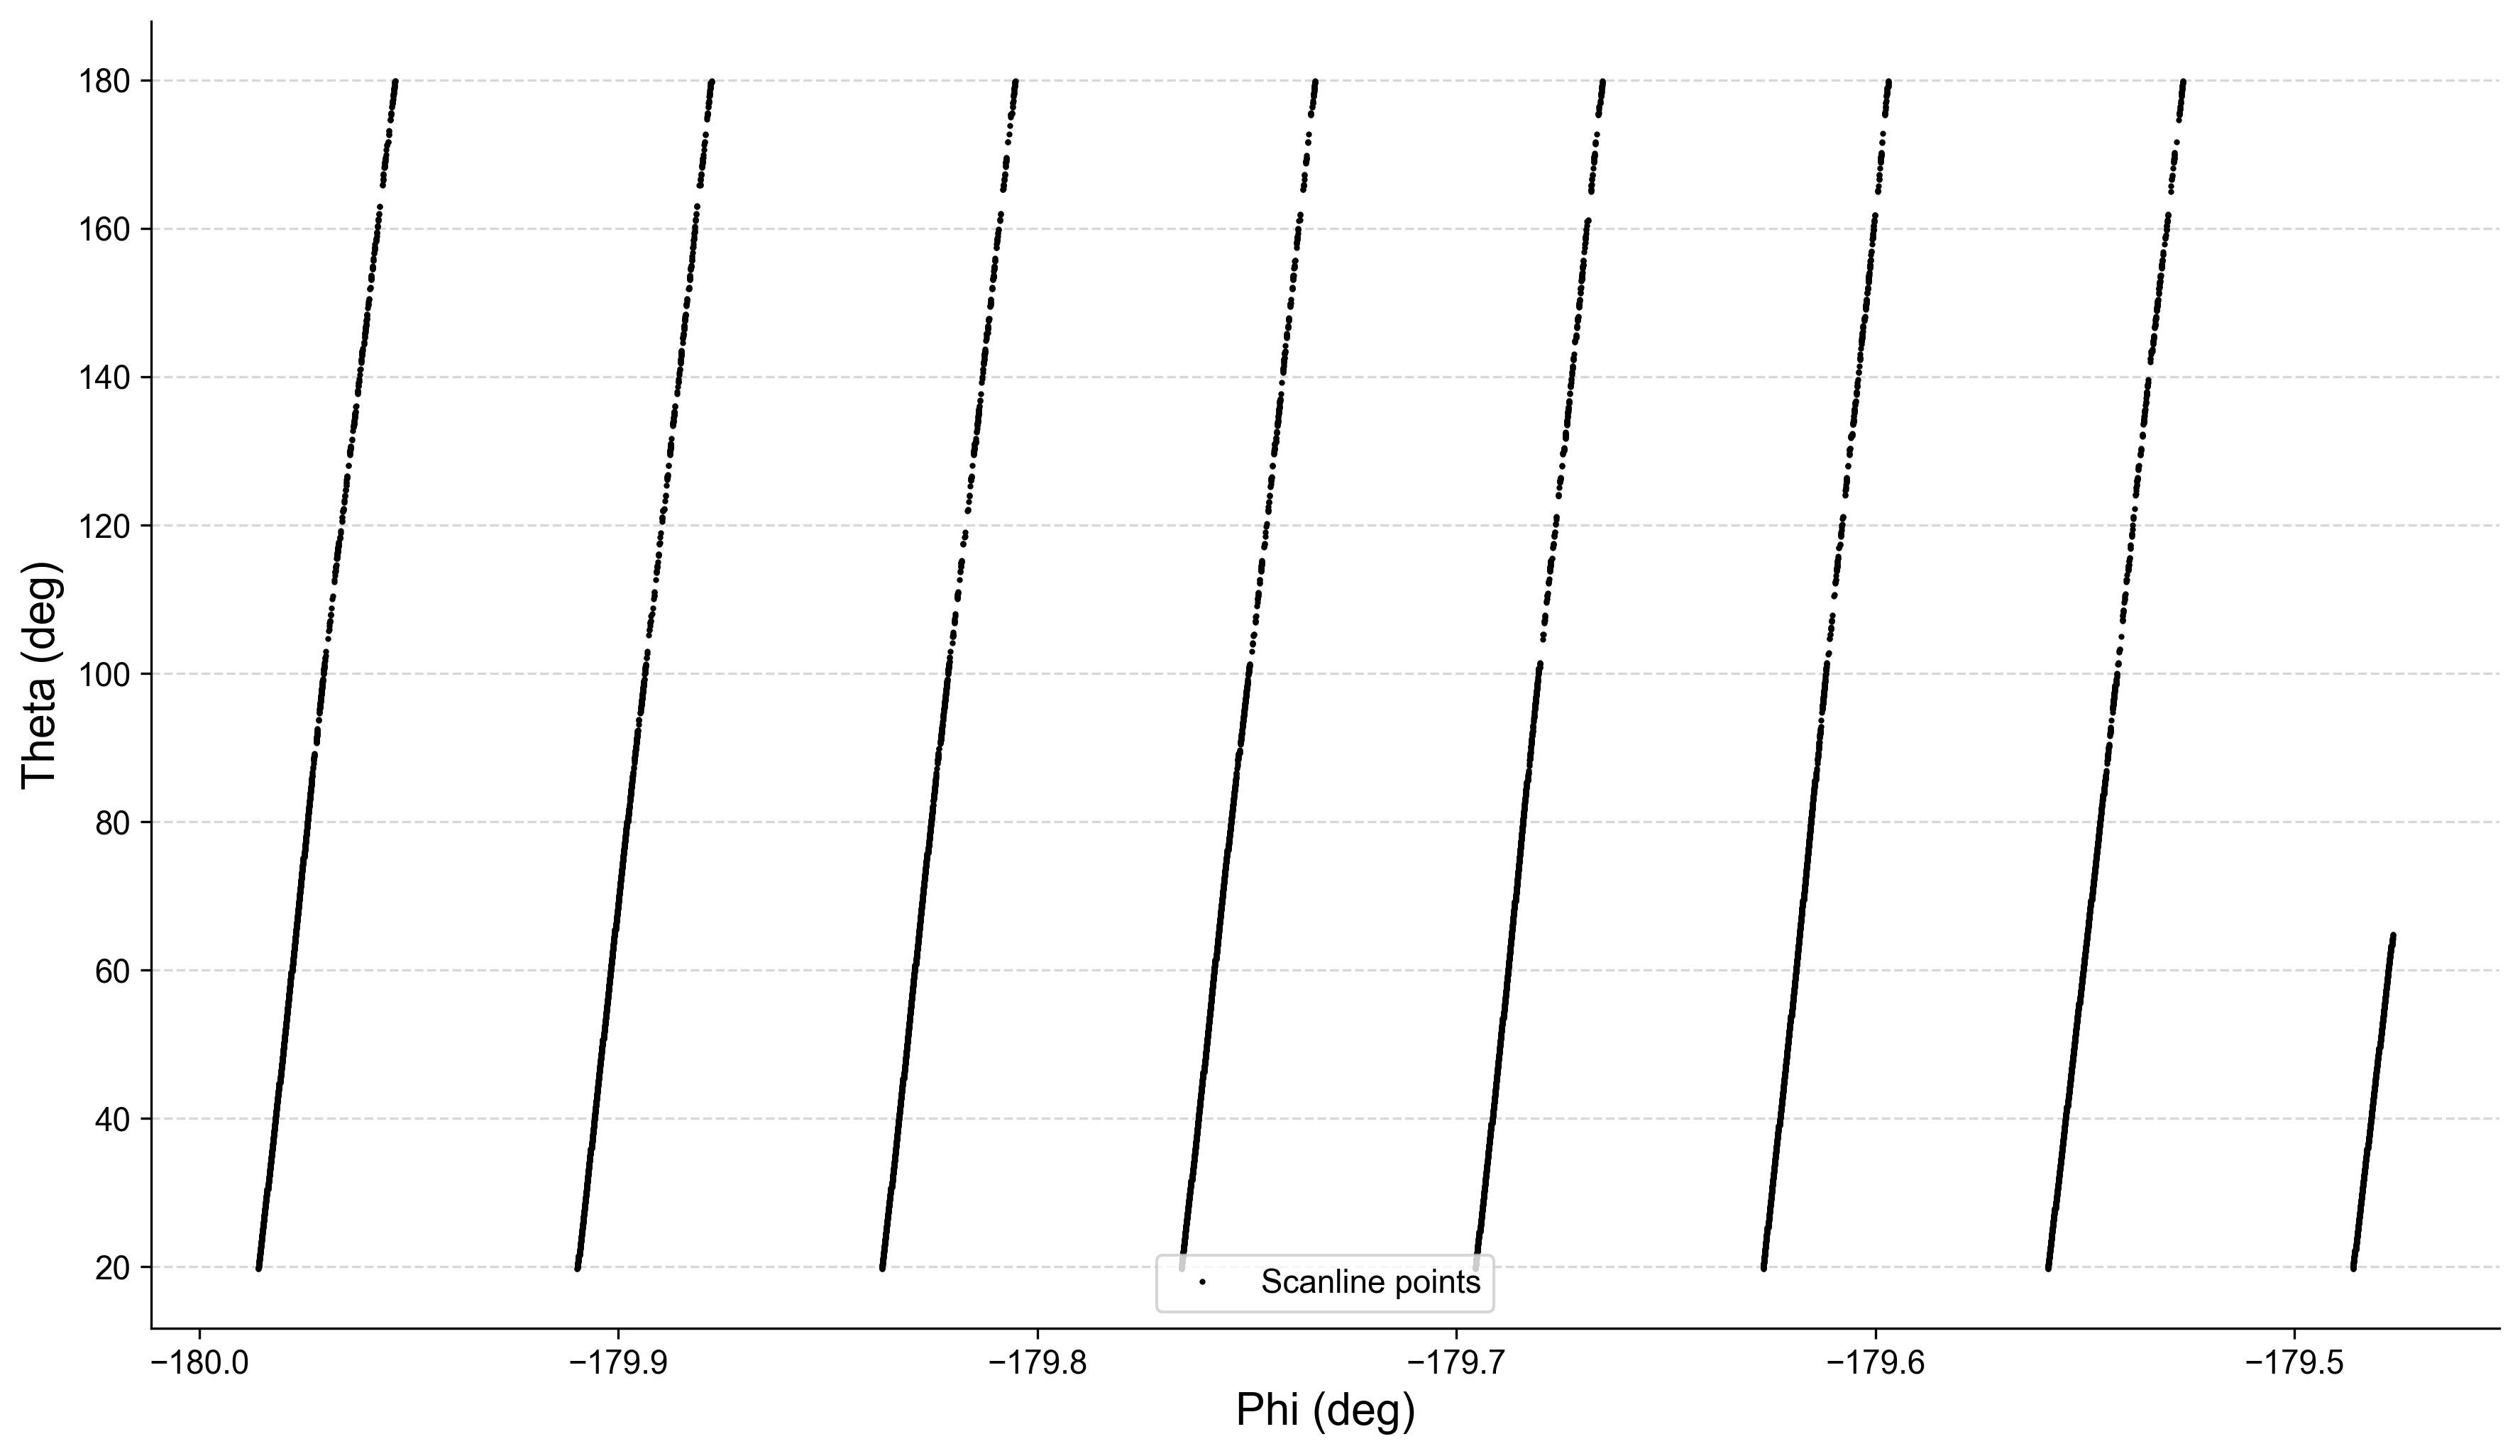

In [8]:
phi = pcd[0:10000, 8].copy()
theta = pcd[0:10000, 9].copy()


fig, ax1 = plt.subplots(figsize=(12, 7)) 

ax1.plot(phi, theta, 'o', markersize=1, label='Scanline points', color='black')

ax1.set_xlabel('Phi (deg)', fontdict={'size': 15})
ax1.set_ylabel('Theta (deg)', fontdict={'size': 15})

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Set the size of the tick labels
ax1.tick_params(axis='y', labelsize=11)
ax1.tick_params(axis='x', labelsize=11)
#ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add grid
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

# Ajust legend
ax1.legend(loc='lower center', fontsize=11, title='')

plt.tight_layout()
plt.show()

/var/folders/j6/k2j8s_l175g46msm1l9hzz780000gn/T/ipykernel_13039/1113394170.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


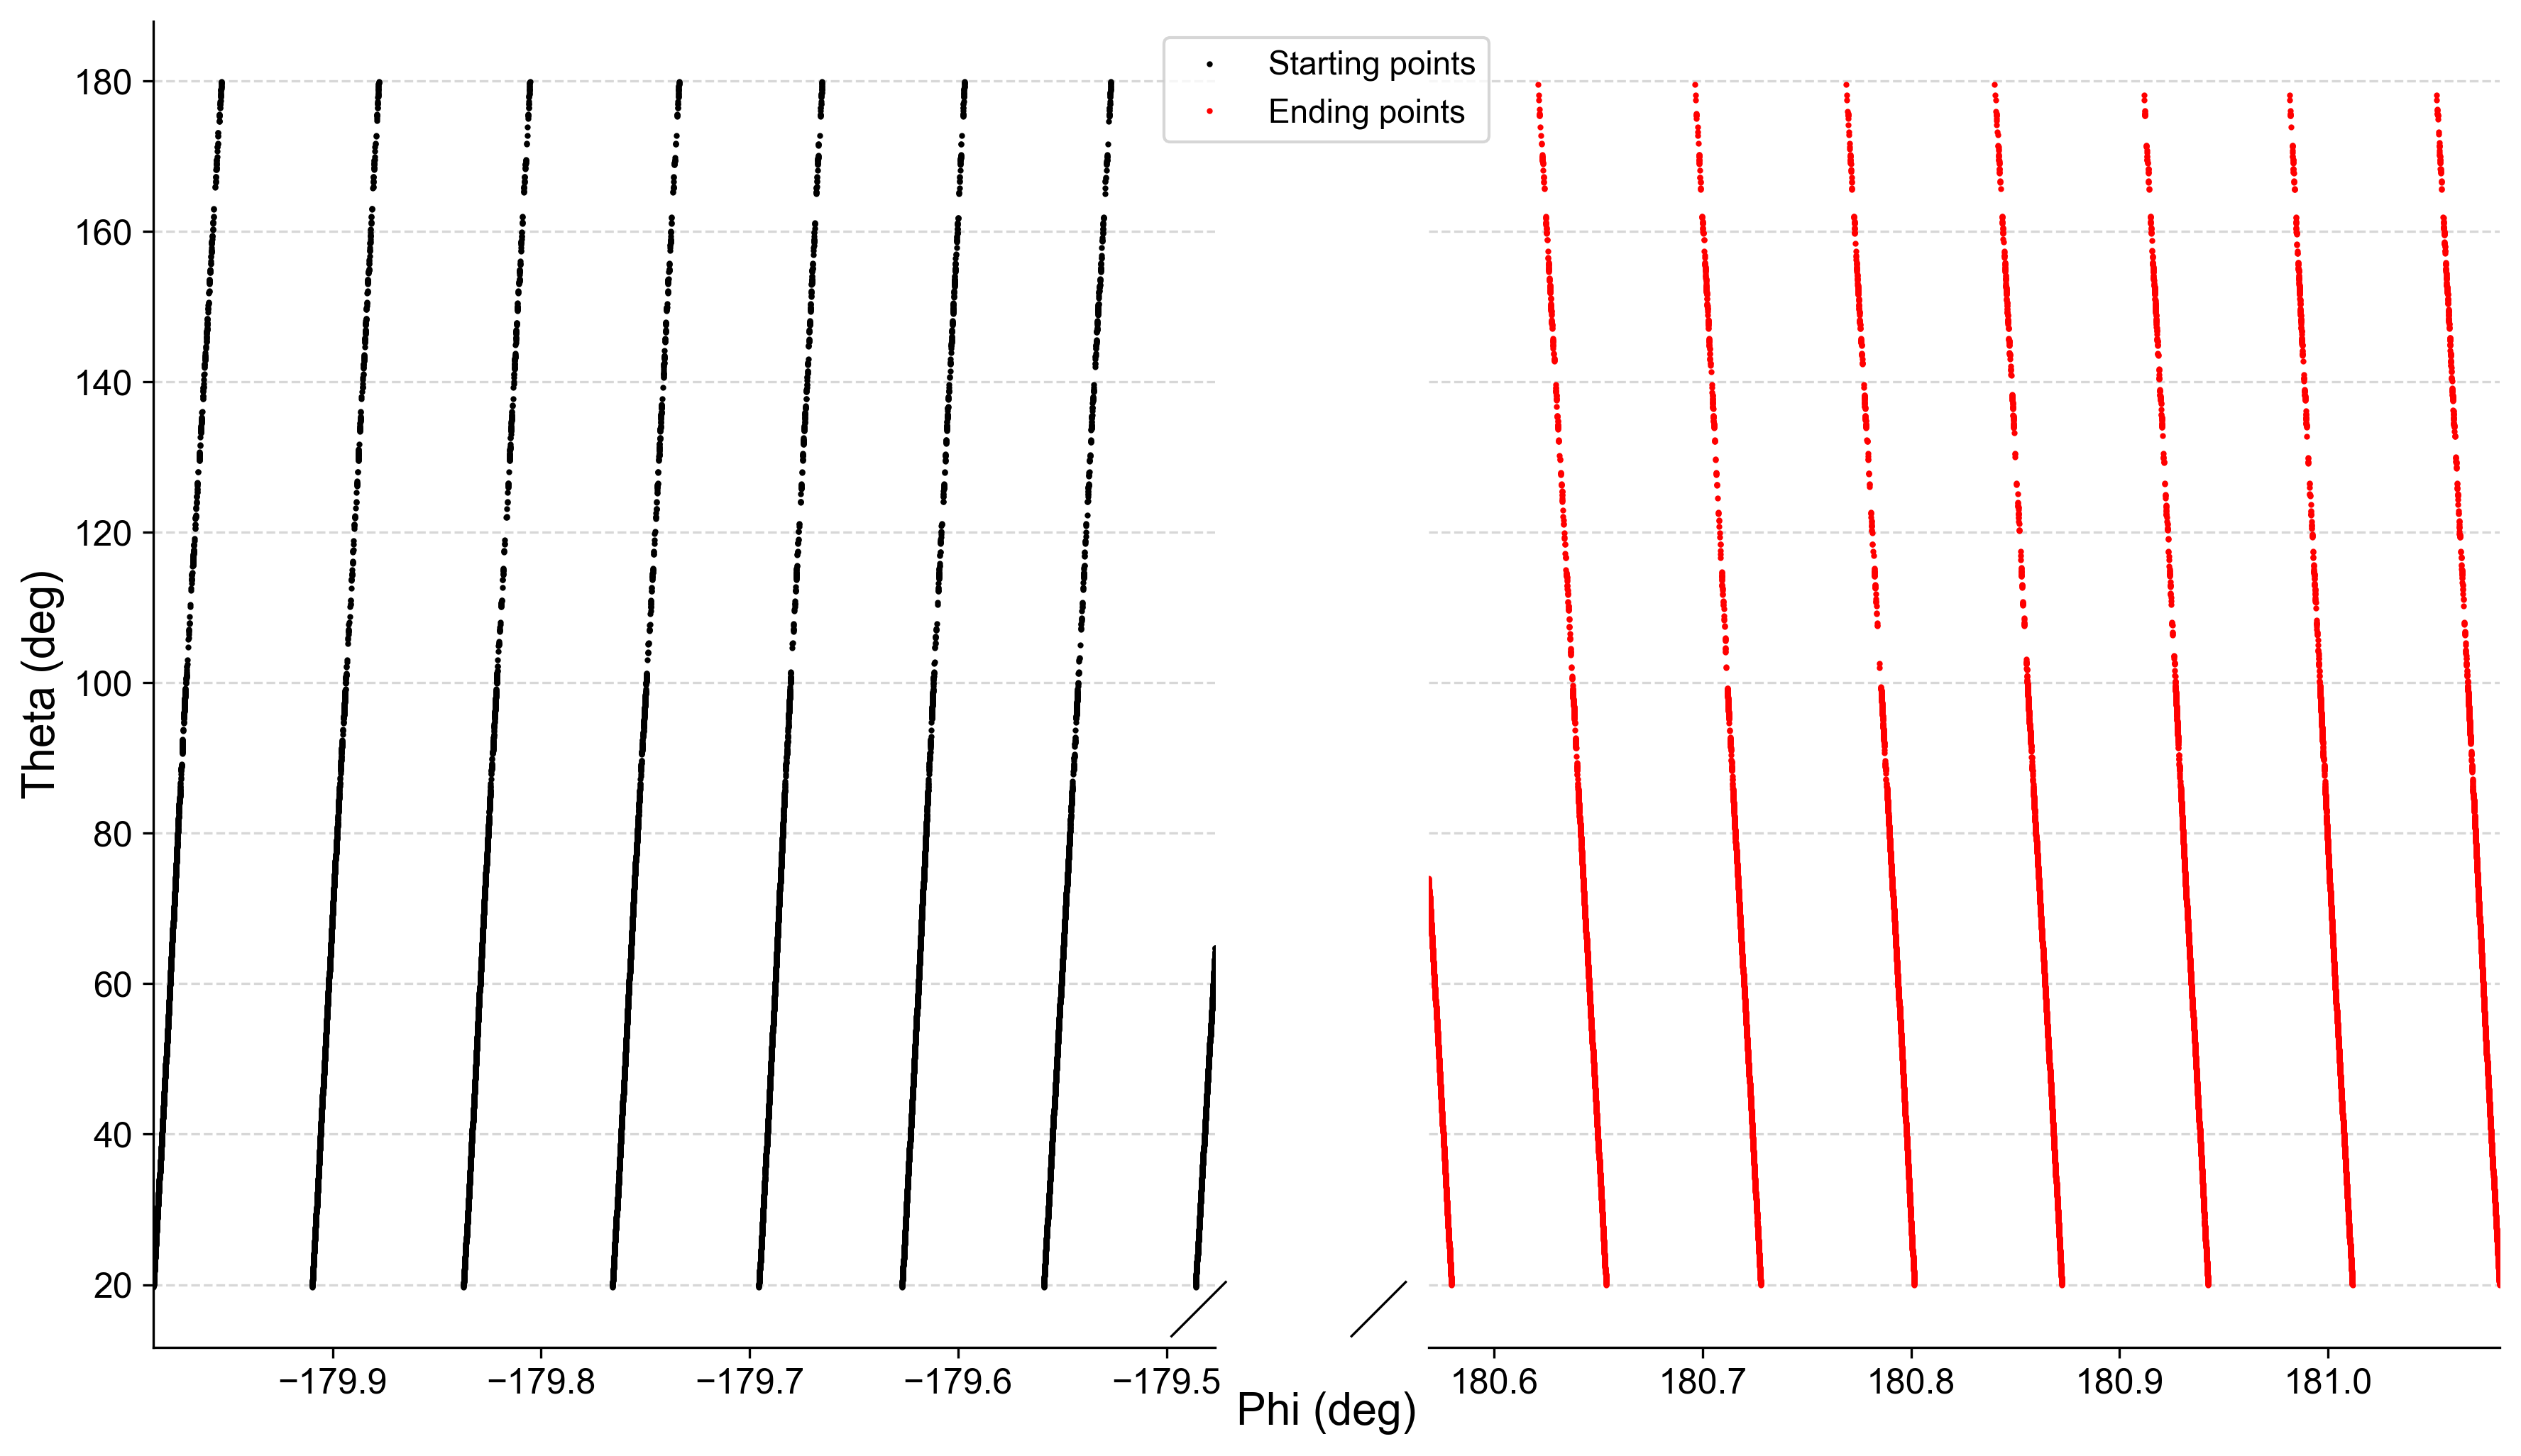

In [11]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

# Get the first 10000 points and the last 10000 points
phi_start = pcd[0:10000, 8].copy()
theta_start = pcd[0:10000, 9].copy()

phi_end = pcd[-10000:, 8].copy()
theta_end = pcd[-10000:, 9].copy()

# Calculate the difference of the theta values
theta_diff_start = np.abs(np.diff(theta_start))
theta_diff_end = np.abs(np.diff(theta_end))

# Create a figure with broken axes
fig = plt.figure(figsize=(12, 7))
bax = brokenaxes(xlims=((min(phi_start), max(phi_start)), (min(phi_end), max(phi_end))), hspace=.05)

# Plot the points
bax.plot(phi_start, theta_start, 'o', markersize=1, label='Starting points', color='black')
bax.plot(phi_end, theta_end, 'o', markersize=1, label='Ending points', color='red')

# Set labels
bax.set_xlabel('Phi (deg)', fontdict={'size': 15})
bax.set_ylabel('Theta (deg)', fontdict={'size': 15})

# Add grid
bax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Adjust legend
bax.legend(loc='upper center', fontsize=11, title='')

plt.tight_layout()
plt.show()

/var/folders/j6/k2j8s_l175g46msm1l9hzz780000gn/T/ipykernel_13039/1471738223.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


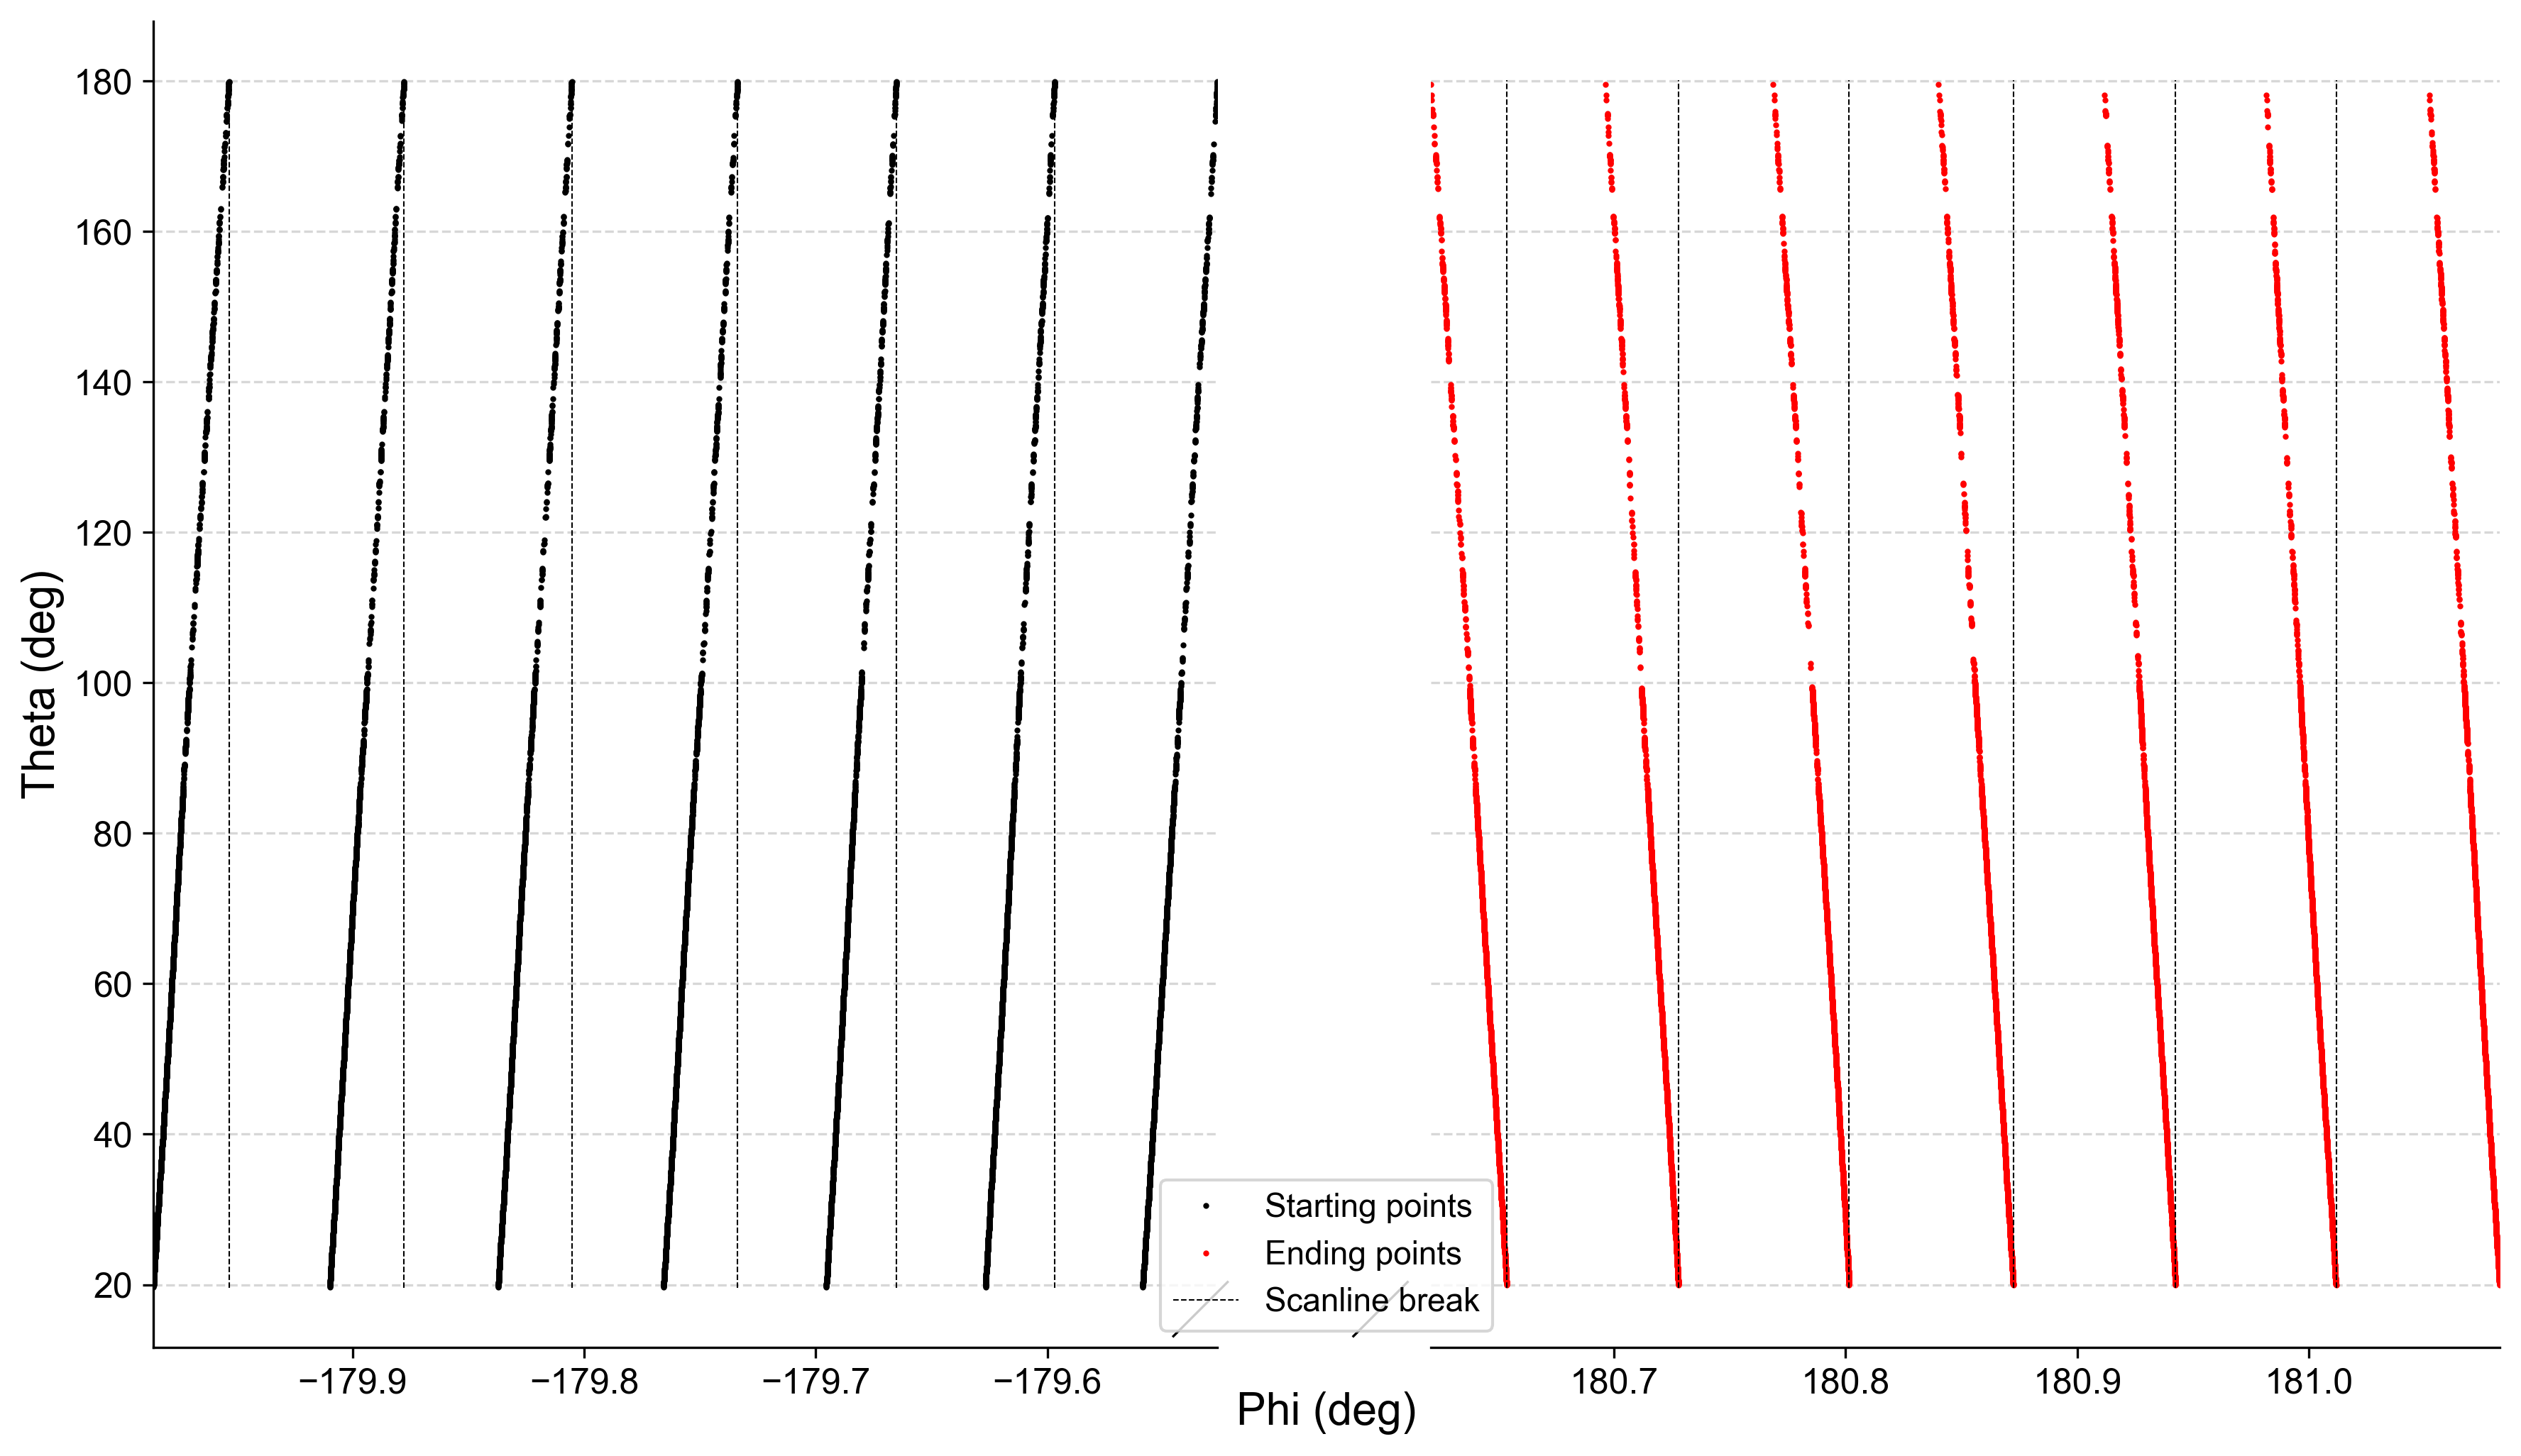

In [63]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

# Get the first 10000 points and the last 10000 points
phi_start = pcd[0:9377, 8].copy()
theta_start = pcd[0:9377, 9].copy()

phi_end = pcd[-9251:, 8].copy()
theta_end = pcd[-9251:, 9].copy()

# Calculate the difference of the theta values
theta_diff_start = np.abs(np.diff(theta_start))
theta_diff_end = np.abs(np.diff(theta_end))

# Create a figure with broken axes
fig = plt.figure(figsize=(12, 7))
bax = brokenaxes(xlims=((min(phi_start), max(phi_start)), (min(phi_end), max(phi_end))), hspace=.05)

# Plot the points
bax.plot(phi_start, theta_start, 'o', markersize=1, label='Starting points', color='black')
bax.plot(phi_end, theta_end, 'o', markersize=1, label='Ending points', color='red')

indices_start = np.where(theta_diff_start > 100)[0]
indices_end = np.where(theta_diff_end > 100)[0]

# Add vertical lines at these indices
for idx, i in enumerate(indices_start):
    if idx < len(indices_start)-1:
        bax.axvline(x=phi_start[i], ymin=8/180, ymax=172/180, color='black', linestyle='--', linewidth=0.5)
    else:
        bax.axvline(x=phi_start[i], ymin=8/180, ymax=172/180, color='black', linestyle='--', linewidth=0.5, label='Scanline break')

for idx, i in enumerate(indices_end):
    if idx < len(indices_end)-1:
        bax.axvline(x=phi_end[i], ymin=8/180, ymax=172/180, color='black', linestyle='--', linewidth=0.5)
    else:
        bax.axvline(x=phi_end[i], ymin=8/180, ymax=172/180, color='black', linestyle='--', linewidth=0.5)

# Set labels
bax.set_xlabel('Phi (deg)', fontdict={'size': 15})
bax.set_ylabel('Theta (deg)', fontdict={'size': 15})

# Add grid
bax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Adjust legend
bax.legend(loc='lower center', fontsize=11, title='')

plt.tight_layout()
plt.show()